In [1]:
'''
In this example, we will load a RefineDet model and use it to detect objects.
'''

import argparse
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
# Make sure that caffe is on the python path:
caffe_root = './'
os.chdir(caffe_root)
sys.path.insert(0, os.path.join(caffe_root, 'python'))
import caffe

from google.protobuf import text_format
from caffe.proto import caffe_pb2



def ShowResults2(img, image_file, results, threshold=0.6, save_fig=False):
    plt.figure()
    plt.imshow(img)
    ax = plt.gca()
    for i in range(0, results.shape[0]):
        score = results[i, -2]
        if threshold and score < threshold:
            continue
        label = int(results[i, -1])
#         if label != 1:
#             continue
        name = str(label)
        xmin = int(round(results[i, 0]))
        ymin = int(round(results[i, 1]))
        xmax = int(round(results[i, 2]))
        ymax = int(round(results[i, 3]))
        coords = (xmin, ymin), xmax - xmin, ymax - ymin
        ax.add_patch(plt.Rectangle(*coords, fill=False, edgecolor='white', linewidth=3))
        display_text = '%s: %.2f' % (name, score)
        ax.text(xmin, ymin, display_text, color='white')
        plt.imshow(img)
    plt.show()
    
def ShowResults(img, image_file, results, threshold=0.6, save_fig=False):
    plt.figure()
    img = cv2.imread(image_file)
    for i in range(0, results.shape[0]):
        score = results[i, -2]
        if threshold and score < threshold:
            continue
        label = int(results[i, -1])
        if label != 1:
            continue
        name = str(label)
        xmin = int(round(results[i, 0]))
        ymin = int(round(results[i, 1]))
        xmax = int(round(results[i, 2]))
        ymax = int(round(results[i, 3]))
        coords = (xmin, ymin), xmax - xmin, ymax - ymin
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 255, 255), 3)
#         ax.add_patch(plt.Rectangle(*coords, fill=False, edgecolor='white', linewidth=3))
        display_text = '%s: %.2f' % (name, score)
        cv2.putText(img, display_text, (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 1, color=(255,255,255), thickness=3)
#         ax.text(xmin, ymin, display_text, color='white')
        plt.imshow(img)
    if save_fig:
        cv2.imwrite(image_file[:-4] + '_dets.jpg', img)
        print('Saved: ' + image_file[:-4] + '_dets.jpg')
    plt.show()

0.425531914894%


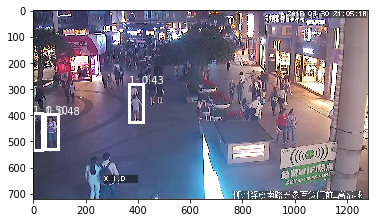

0.851063829787%


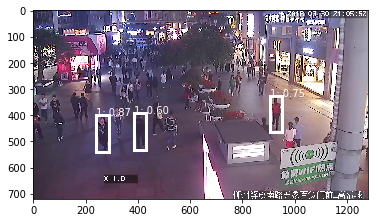

1.27659574468%


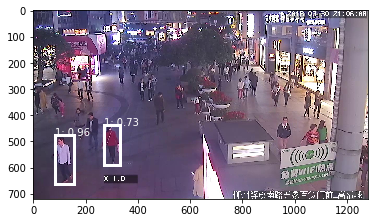

1.70212765957%


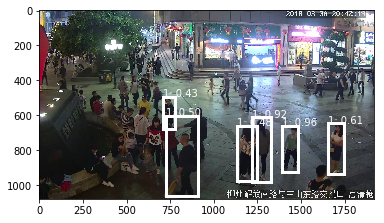

2.12765957447%


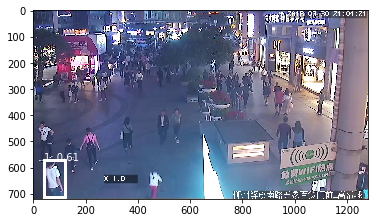

2.55319148936%


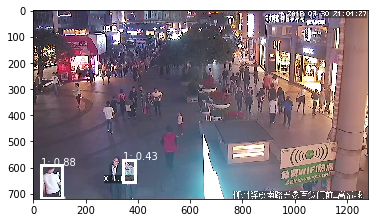

2.97872340426%


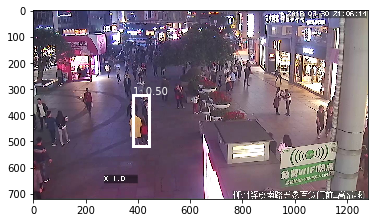

3.40425531915%


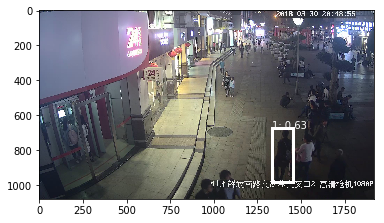

3.82978723404%


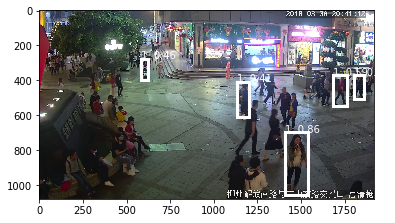

4.25531914894%


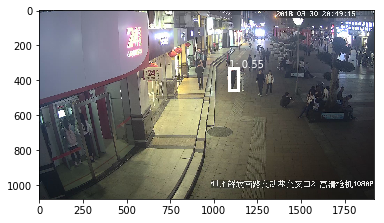

4.68085106383%


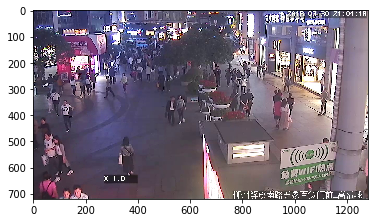

5.10638297872%


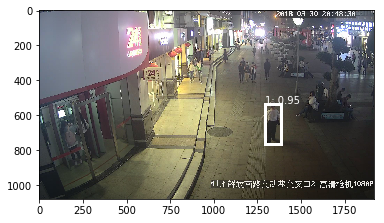

5.53191489362%


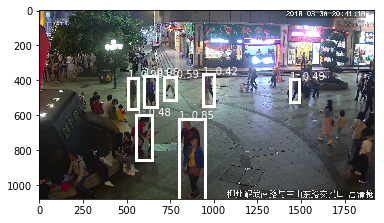

5.95744680851%


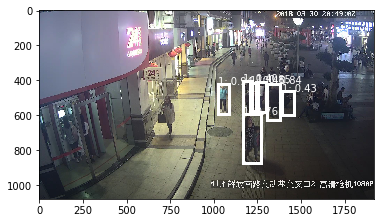

6.3829787234%


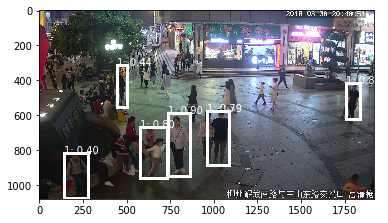

6.8085106383%


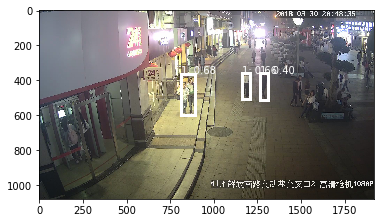

7.23404255319%


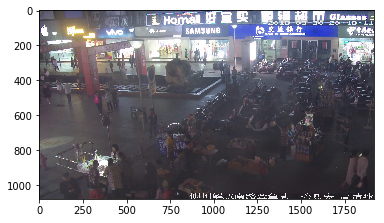

7.65957446809%


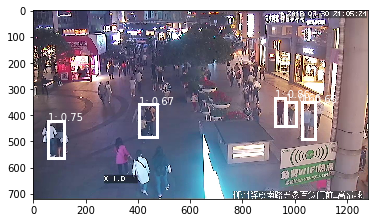

8.08510638298%


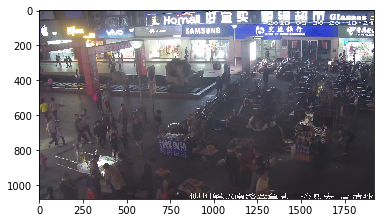

8.51063829787%


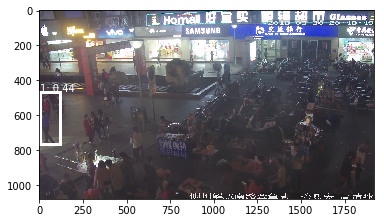

8.93617021277%


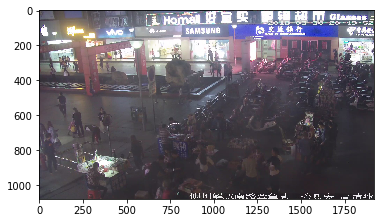

9.36170212766%


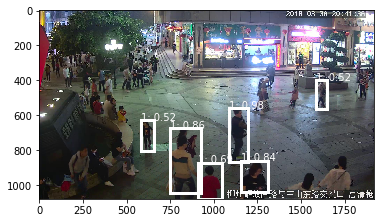

9.78723404255%


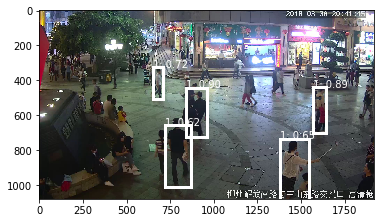

10.2127659574%


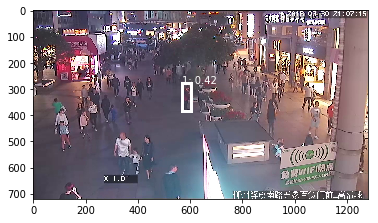

10.6382978723%


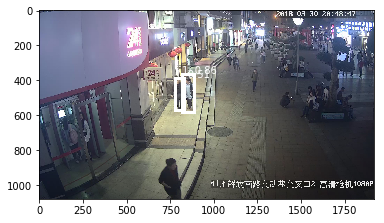

11.0638297872%


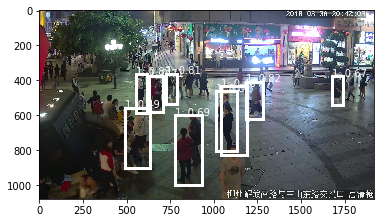

11.4893617021%


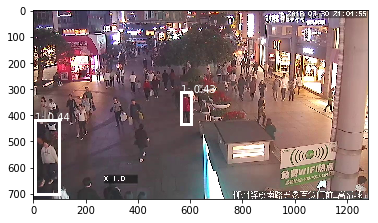

11.914893617%


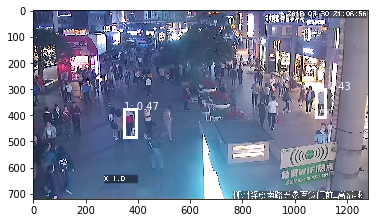

12.3404255319%


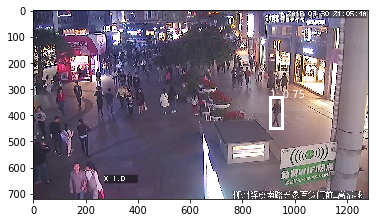

12.7659574468%


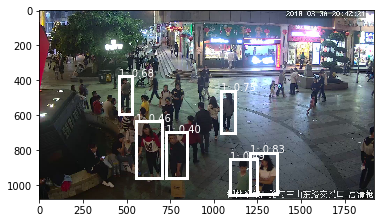

13.1914893617%


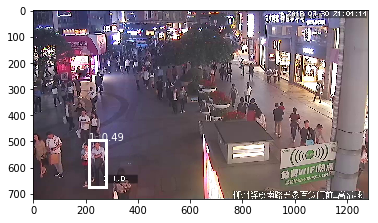

13.6170212766%


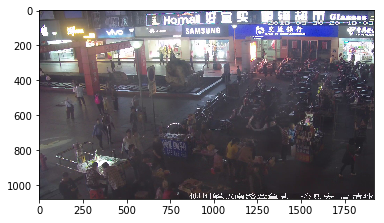

14.0425531915%


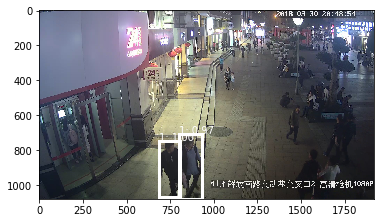

14.4680851064%


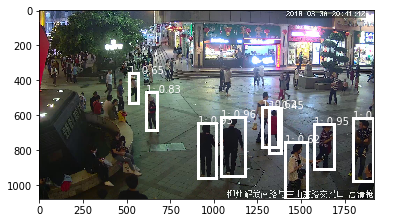

14.8936170213%


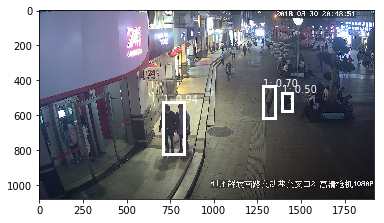

15.3191489362%


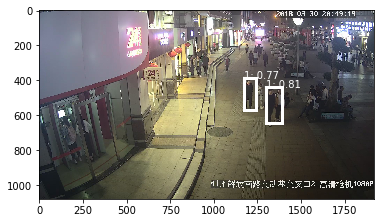

15.7446808511%


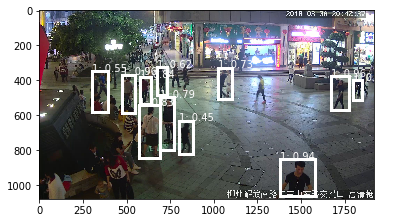

16.170212766%


In [ ]:
if __name__ == '__main__':
    # gpu preparation
    caffe.set_device(0)
    caffe.set_mode_gpu()

    # load model
    model_def = 'models/ResNet/coco/refinedet_resnet18_1024x1024/deploy.prototxt'
    model_weights = 'models/ResNet/coco/refinedet_resnet18_1024x1024/coco_refinedet_resnet18_1024x1024_iter_10000.caffemodel'
    net = caffe.Net(model_def, model_weights, caffe.TEST)

    # image preprocessing
    img_resize = 1024
    net.blobs['data'].reshape(1, 3, img_resize, img_resize)
    transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
    transformer.set_transpose('data', (2, 0, 1))
    transformer.set_mean('data', np.array([104, 117, 123]))  # mean pixel
    transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
    transformer.set_channel_swap('data', (2, 1, 0))  # the reference model has channels in BGR order instead of RGB

    im_names = os.listdir('/home/wangjilong/pedestrian/dataset/test/3/')
    #print(im_names)
    #im_names = ['3_00008637_0.jpg', '3_00008659_1.jpg']
    count = len([x for x in im_names if 'dets' not in x])
    process = 0
    for im_name in im_names:
        if 'dets' in im_name:
            continue
        process = process + 1
        print(str(float(process)/count * 100) + '%')
        image_file = '/home/wangjilong/pedestrian/dataset/test/3/' + im_name
        image = caffe.io.load_image(image_file)
        transformed_image = transformer.preprocess('data', image)
        net.blobs['data'].data[...] = transformed_image

        detections = net.forward()['detection_out']
        det_label = detections[0, 0, :, 1]
        det_conf = detections[0, 0, :, 2]
        det_xmin = detections[0, 0, :, 3] * image.shape[1]
        det_ymin = detections[0, 0, :, 4] * image.shape[0]
        det_xmax = detections[0, 0, :, 5] * image.shape[1]
        det_ymax = detections[0, 0, :, 6] * image.shape[0]
        result = np.column_stack([det_xmin, det_ymin, det_xmax, det_ymax, det_conf, det_label])

        # show result
        ShowResults2(image, image_file, result, 0.4, save_fig=True)

In [4]:
caffe.set_device(0)
caffe.set_mode_gpu()

# load model
model_def = 'models/ResNet/coco/refinedet_resnet18_1024x1024/deploy.prototxt'
model_weights = 'models/ResNet/coco/refinedet_resnet18_1024x1024/coco_refinedet_resnet18_1024x1024_iter_15.caffemodel'
net = caffe.Net(model_def, model_weights, caffe.TEST)

# image preprocessing
img_resize = 1024
net.blobs['data'].reshape(1, 3, img_resize, img_resize)
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2, 0, 1))
transformer.set_mean('data', np.array([104, 117, 123]))  # mean pixel
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2, 1, 0))  # the reference model has channels in BGR order instead of RGB

im_names = os.listdir('/home/wangjilong/pedestrian/dataset/test/1/')
im_names = [x for x in im_names if 'dets' not in x]
count = len(im_names)
import time;
time_count = 0
for im_name in im_names:
    image_file = '/home/wangjilong/pedestrian/dataset/test/1/' + im_name
    image = caffe.io.load_image(image_file)
    transformed_image = transformer.preprocess('data', image)
    net.blobs['data'].data[...] = transformed_image
    time_start = time.time()
    detections = net.forward()['detection_out']
    time_end = time.time()
    time_count = time_count + time_end-time_start
print(time_count)

1.18844270706


In [5]:
print(count)
print((time_count)/count)

60
0.019807378451
